# An Analytical Dive into Autonomous Vehicle Technologies and Performance Metrics

In [1]:
# Import pandas, matplotlib, numpy and seaborn libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [2]:
# Import the excel data file from my PC
avd = pd.read_excel(r'C:\Users\Mr. Seedball\Desktop\Portfolio\Autonomous Vehicle Development\autonomous_vehicle_development.xlsx', index_col = False)

In [3]:
# To have an overview of the dataset
avd.head(5)

,Vehicle_ID,Make_Model,Year_of_Manufacture,Battery_Capacity_kWh,Range_Per_Charge_miles,Sensor_Type,Software_Version,Weather_Condition,Time_of_Day,Traffic_Conditions,Obstacle_Detection_Time_seconds,Reaction_Time_seconds,Incident_Rate,Success_Rate
0,1,Model_C,2019,79.96,306.4,Radar,V1.5,Snowy,Afternoon,High,4.3632,1.5120,8,63.7704
1,2,Model_D,2015,75.69,244.0,Camera,V1.0,Sunny,Evening,Low,2.5432,0.6424,4,83.1768
2,3,Model_A,2019,64.41,276.0,LiDAR,V1.0,Rainy,Morning,High,4.2228,0.8424,0,68.6812
3,4,Model_C,2015,50.32,344.4,Camera,V2.5,Rainy,Evening,High,2.1736,0.4664,4,100.0000
4,5,Model_C,2018,74.81,260.8,Radar,V2.5,Snowy,Morning,Low,0.9108,0.2640,7,64.0016


In [4]:
# To check for missing data points
missing_values = avd.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Vehicle_ID                         0
Make_Model                         0
Year_of_Manufacture                0
Battery_Capacity_kWh               0
Range_Per_Charge_miles             0
Sensor_Type                        0
Software_Version                   0
Weather_Condition                  0
Time_of_Day                        0
Traffic_Conditions                 0
Obstacle_Detection_Time_seconds    0
Reaction_Time_seconds              0
Incident_Rate                      0
Success_Rate                       0
dtype: int64


In [5]:
# To check for duplicated data points
duplicate_rows = avd.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


In [6]:
# To have an overview of the dataset types for each column
print("Data types of each column:\n", avd.dtypes)

Data types of each column:
 Vehicle_ID                           int64
Make_Model                          object
Year_of_Manufacture                  int64
Battery_Capacity_kWh               float64
Range_Per_Charge_miles             float64
Sensor_Type                         object
Software_Version                    object
Weather_Condition                   object
Time_of_Day                         object
Traffic_Conditions                  object
Obstacle_Detection_Time_seconds    float64
Reaction_Time_seconds              float64
Incident_Rate                        int64
Success_Rate                       float64
dtype: object


In [7]:
# To have a summary statistics of the dataset variables 
print("Descriptive statistics for the dataset:\n", avd.describe())

Descriptive statistics for the dataset:
         Vehicle_ID  Year_of_Manufacture  Battery_Capacity_kWh  \
count  4500.000000          4500.000000           4500.000000   
mean   2250.500000          2018.528222             74.567469   
std    1299.182435             2.279016             14.348658   
min       1.000000          2015.000000             50.010000   
25%    1125.750000          2017.000000             62.222500   
50%    2250.500000          2019.000000             74.245000   
75%    3375.250000          2021.000000             86.902500   
max    4500.000000          2022.000000             99.970000   

       Range_Per_Charge_miles  Obstacle_Detection_Time_seconds  \
count             4500.000000                      4500.000000   
mean               264.776089                         2.952954   
std                 70.948490                         1.542584   
min                160.000000                         0.367200   
25%                210.400000              

In [8]:
# To check for uniqueness of categorical data columns
for column in ['Make_Model', 'Sensor_Type', 'Software_Version', 'Weather_Condition', 'Time_of_Day', 'Traffic_Conditions']:
    print(f"Unique values in {column}:", avd[column].unique())

Unique values in Make_Model: ['Model_C' 'Model_D' 'Model_A' 'Model_B']
Unique values in Sensor_Type: ['Radar' 'Camera' 'LiDAR']
Unique values in Software_Version: ['V1.5' 'V1.0' 'V2.5' 'V2.0']
Unique values in Weather_Condition: ['Snowy' 'Sunny' 'Rainy']
Unique values in Time_of_Day: ['Afternoon' 'Evening' 'Morning']
Unique values in Traffic_Conditions: ['High' 'Low' 'Medium']


#### Quality assessment of my dataset revelas no cleaning or transformation is needed, proceed to EDA and modeling

# How do different sensor types affect autonomous vehicle performance?

In [9]:
# I need to group this dataset by 'Sensor_Type' and calculate mean for relevant columns
grouped_data = avd.groupby('Sensor_Type')[['Obstacle_Detection_Time_seconds', 'Reaction_Time_seconds', 'Success_Rate']].mean()

In [10]:
# Print out the means of the grouped dataset
print(grouped_data)

             Obstacle_Detection_Time_seconds  Reaction_Time_seconds  \
Sensor_Type                                                           
Camera                              2.161359               0.674778   
LiDAR                               3.307160               1.011262   
Radar                               3.382265               1.006928   

             Success_Rate  
Sensor_Type                
Camera          78.017779  
LiDAR           77.660304  
Radar           77.562091  


### Cameras have the shortest obstacle detection and reaction times at approximately 2.16 and 0.67 seconds, respectively, with a success rate of about 78%. 

### LiDAR and Radar have longer detection and reaction times (> 3 seconds), with their success rates slightly lower than the camera, around 77.6%.

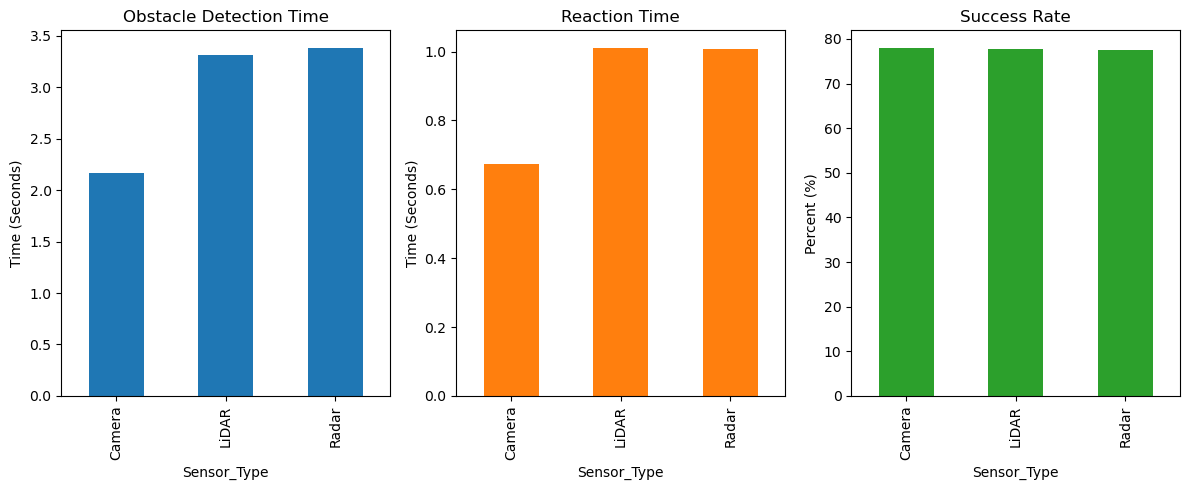

In [11]:
# Plotting of bar charts to visualize the comparison
grouped_data.plot(kind='bar', subplots=True, layout=(1, 3), figsize=(12, 5), legend=False)

# Titles and labels
plt.subplot(1, 3, 1)
plt.title('Obstacle Detection Time')
plt.ylabel('Time (Seconds)')

plt.subplot(1, 3, 2)
plt.title('Reaction Time')
plt.ylabel('Time (Seconds)')

plt.subplot(1, 3, 3)
plt.title('Success Rate')
plt.ylabel('Percent (%)')

plt.tight_layout()
plt.show()


# What impact do environmental conditions have on autonomous driving safety and efficiency?

In [12]:
# Again, I need to group the dataset by 'Weather_Condition' and calculate mean for 'Success_Rate' and 'Incident_Rate'
grouped_weather = avd.groupby('Weather_Condition')[['Success_Rate', 'Incident_Rate']].mean()

In [13]:
# To see the overview of the grouped weather data
print(grouped_weather)

                   Success_Rate  Incident_Rate
Weather_Condition                             
Rainy                 78.154389       4.548365
Snowy                 71.327956       4.551427
Sunny                 83.693648       4.464918


### Sunny weather yields the highest success rate of approximately 83.7% and the lowest incident rate at about 4.46, while snowy conditions have the lowest success rate of around 71.3% and a slightly higher incident rate than rainy conditions. Sunny weather yields about 78% success rate.

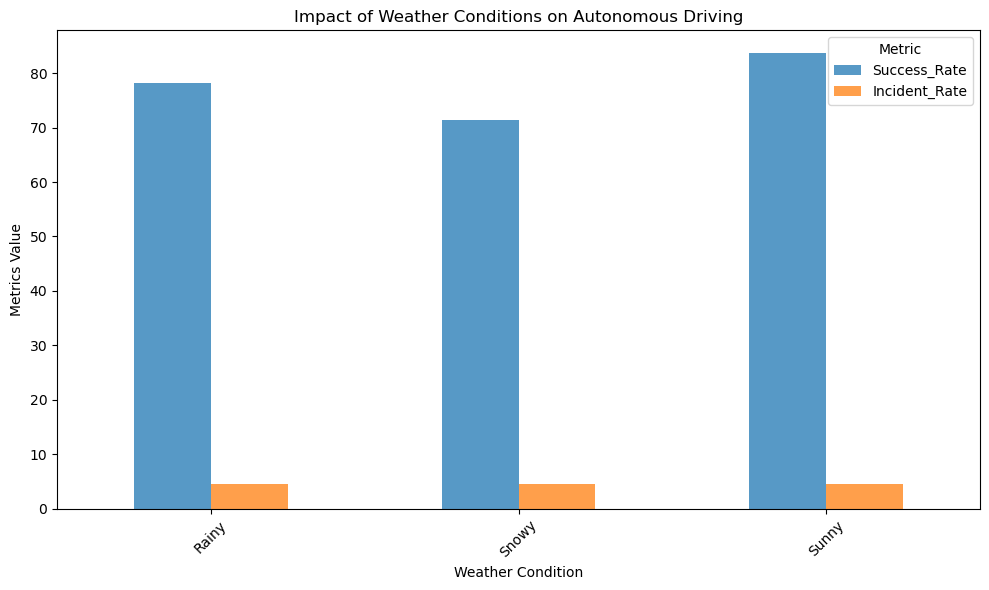

In [14]:
# Plotting of grouped bar chart to visualisze the comparison
grouped_weather.plot(kind='bar', figsize=(10, 6), alpha=0.75, rot=0)

# Titles and labels of the bar chart
plt.title('Impact of Weather Conditions on Autonomous Driving')
plt.ylabel('Metrics Value')
plt.xlabel('Weather Condition')
plt.xticks(rotation=45)
plt.legend(title='Metric')

plt.tight_layout()
plt.show()

## Does traffic density affect the reaction time and obstacle detection capabilities of autonomous vehicles?

In [15]:
# Now, I am grouping the dataset by 'Traffic_Conditions' and calculate mean for 'Reaction_Time_seconds' and 'Obstacle_Detection_Time_seconds'
grouped_traffic = avd.groupby('Traffic_Conditions')[['Reaction_Time_seconds', 'Obstacle_Detection_Time_seconds']].mean()

In [16]:
print(grouped_traffic)

                    Reaction_Time_seconds  Obstacle_Detection_Time_seconds
Traffic_Conditions                                                        
High                             0.890208                         2.945481
Low                              0.892528                         2.944197
Medium                           0.912618                         2.969647


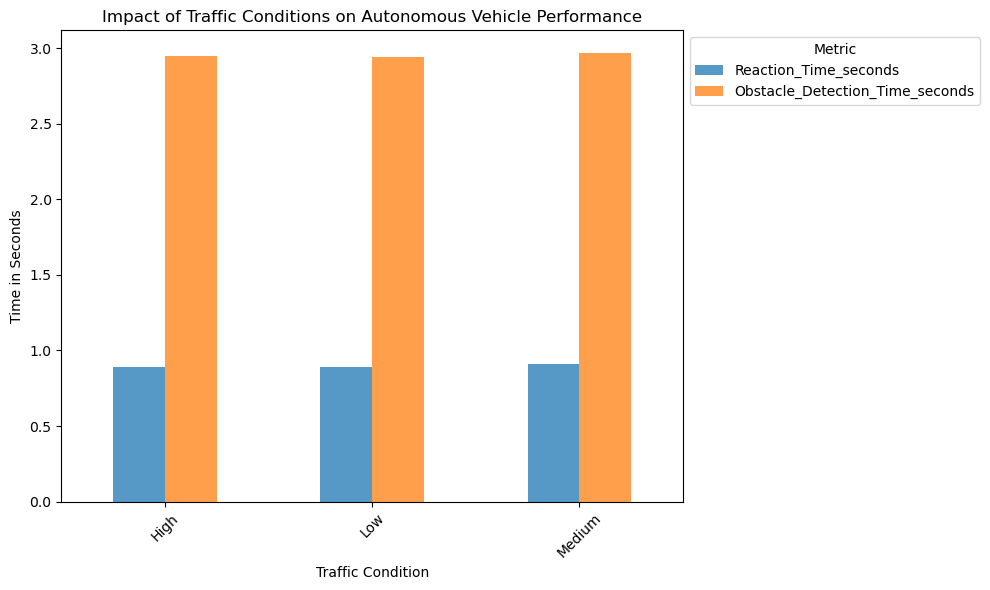

In [17]:
# I will now use the 'grouped_traffic' for graph plotting as a means of data visualization
grouped_traffic.plot(kind='bar', figsize=(10, 6), alpha=0.75, rot=0)

# Titles and labels
plt.title('Impact of Traffic Conditions on Autonomous Vehicle Performance')
plt.ylabel('Time in Seconds')
plt.xlabel('Traffic Condition')
plt.xticks(rotation=45)

# Place the legend outside the plot to make the graph look clearer
plt.legend(title='Metric', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

## Are there any correlations between battery capacity, range per charge, and the overall success rate of autonomous missions?

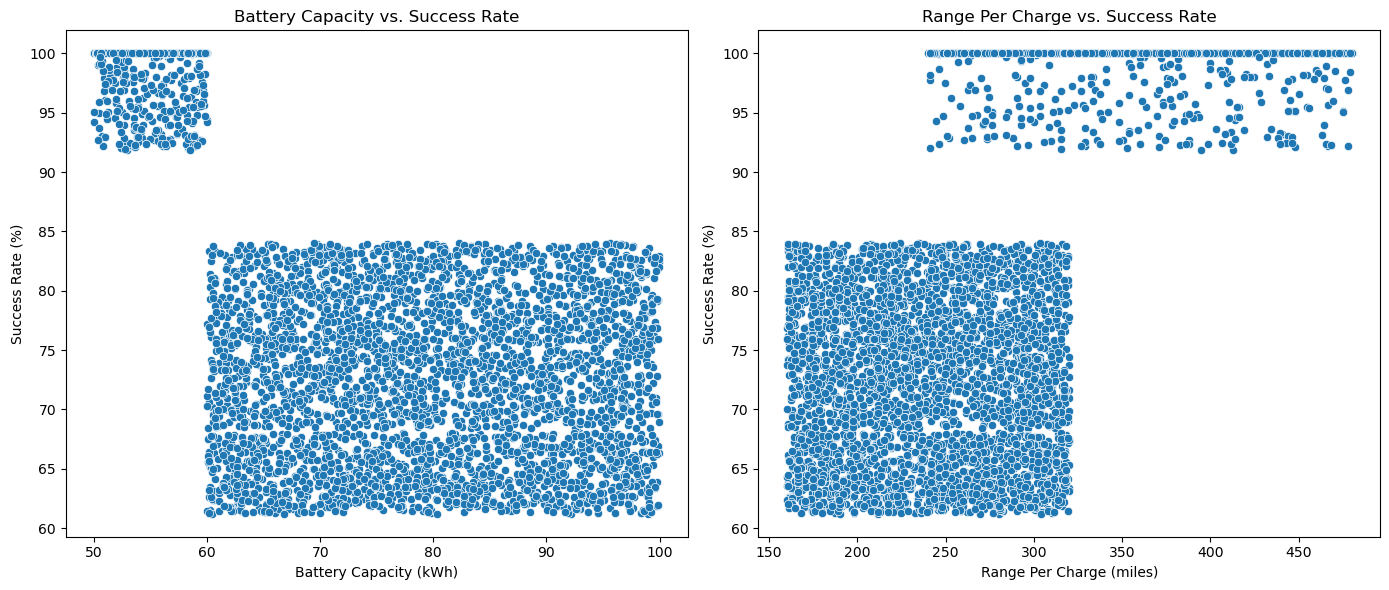

In [18]:
# Plotting
plt.figure(figsize=(14, 6))

# Scatter plot for Battery Capacity vs. Success Rate
plt.subplot(1, 2, 1)
sns.scatterplot(x='Battery_Capacity_kWh', y='Success_Rate', data=avd)
plt.title('Battery Capacity vs. Success Rate')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Success Rate (%)')

# Scatter plot for Range Per Charge vs. Success Rate
plt.subplot(1, 2, 2)
sns.scatterplot(x='Range_Per_Charge_miles', y='Success_Rate', data=avd)
plt.title('Range Per Charge vs. Success Rate')
plt.xlabel('Range Per Charge (miles)')
plt.ylabel('Success Rate (%)')

plt.tight_layout()
plt.show()

## How does the age of the vehicle (Year of Manufacture) relate to its performance metrics and incident rates?

In [19]:
# Group the dataset by 'Year_of_Manufacture' and calculate mean for 'Success_Rate' and 'Incident_Rate'
grouped_year = avd.groupby('Year_of_Manufacture')[['Success_Rate', 'Incident_Rate']].mean().reset_index()

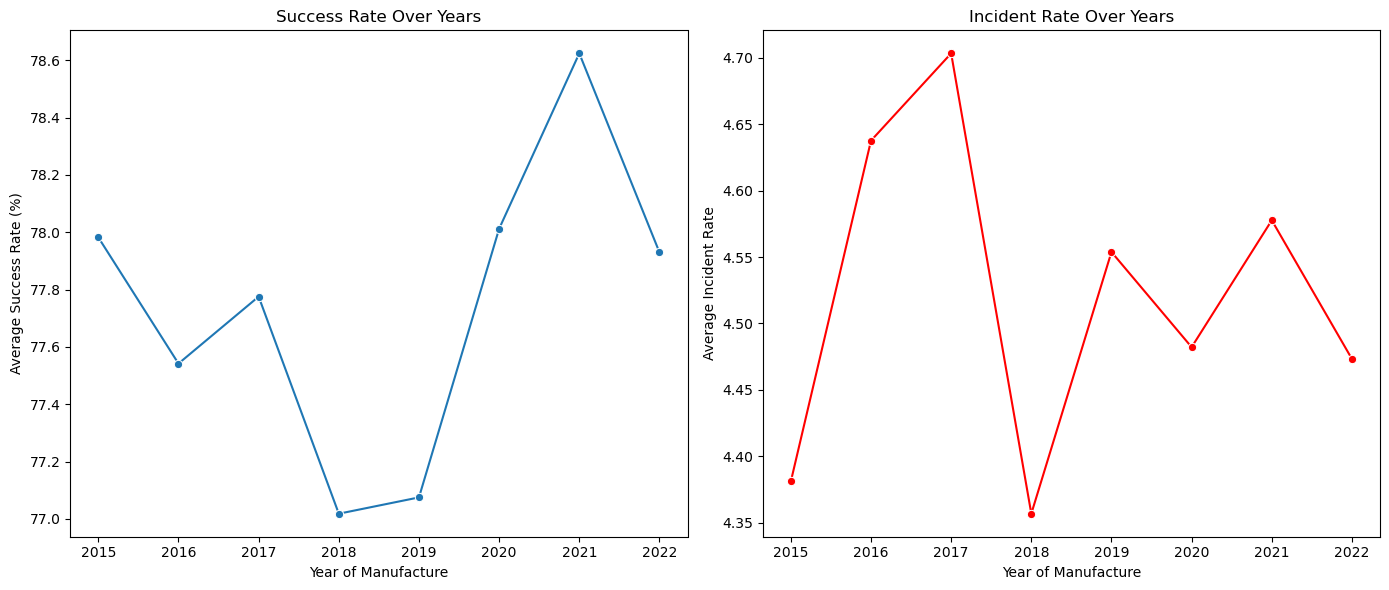

In [20]:
# Plotting graph for visualization
plt.figure(figsize=(14, 6))

# Line plot for Success Rate over Years
plt.subplot(1, 2, 1)
sns.lineplot(x='Year_of_Manufacture', y='Success_Rate', data=grouped_year, marker='o')
plt.title('Success Rate Over Years')
plt.xlabel('Year of Manufacture')
plt.ylabel('Average Success Rate (%)')

# Line plot for Incident Rate over Years
plt.subplot(1, 2, 2)
sns.lineplot(x='Year_of_Manufacture', y='Incident_Rate', data=grouped_year, marker='o', color='red')
plt.title('Incident Rate Over Years')
plt.xlabel('Year of Manufacture')
plt.ylabel('Average Incident Rate')

plt.tight_layout()
plt.show()

### Success Rate Over Years graph shows a fluctuation in the average success rates with slight increases and decreases from 2015 to 2022, but generally hovering around 77% to 78%. 

### Incident Rate Over Years reveals a relatively stable pattern of average incident rates over the same period, with minor variations but generally remaining close to 4.5 incidents.

### Both graphs indicate there have been minor improvements in success rates and stability in incident rates over the years, and that there hasn't been a significant breakthrough in vehicle performance across the years covered by my dataset.

## Can we predict incident rates based on vehicle specifications and operating conditions?

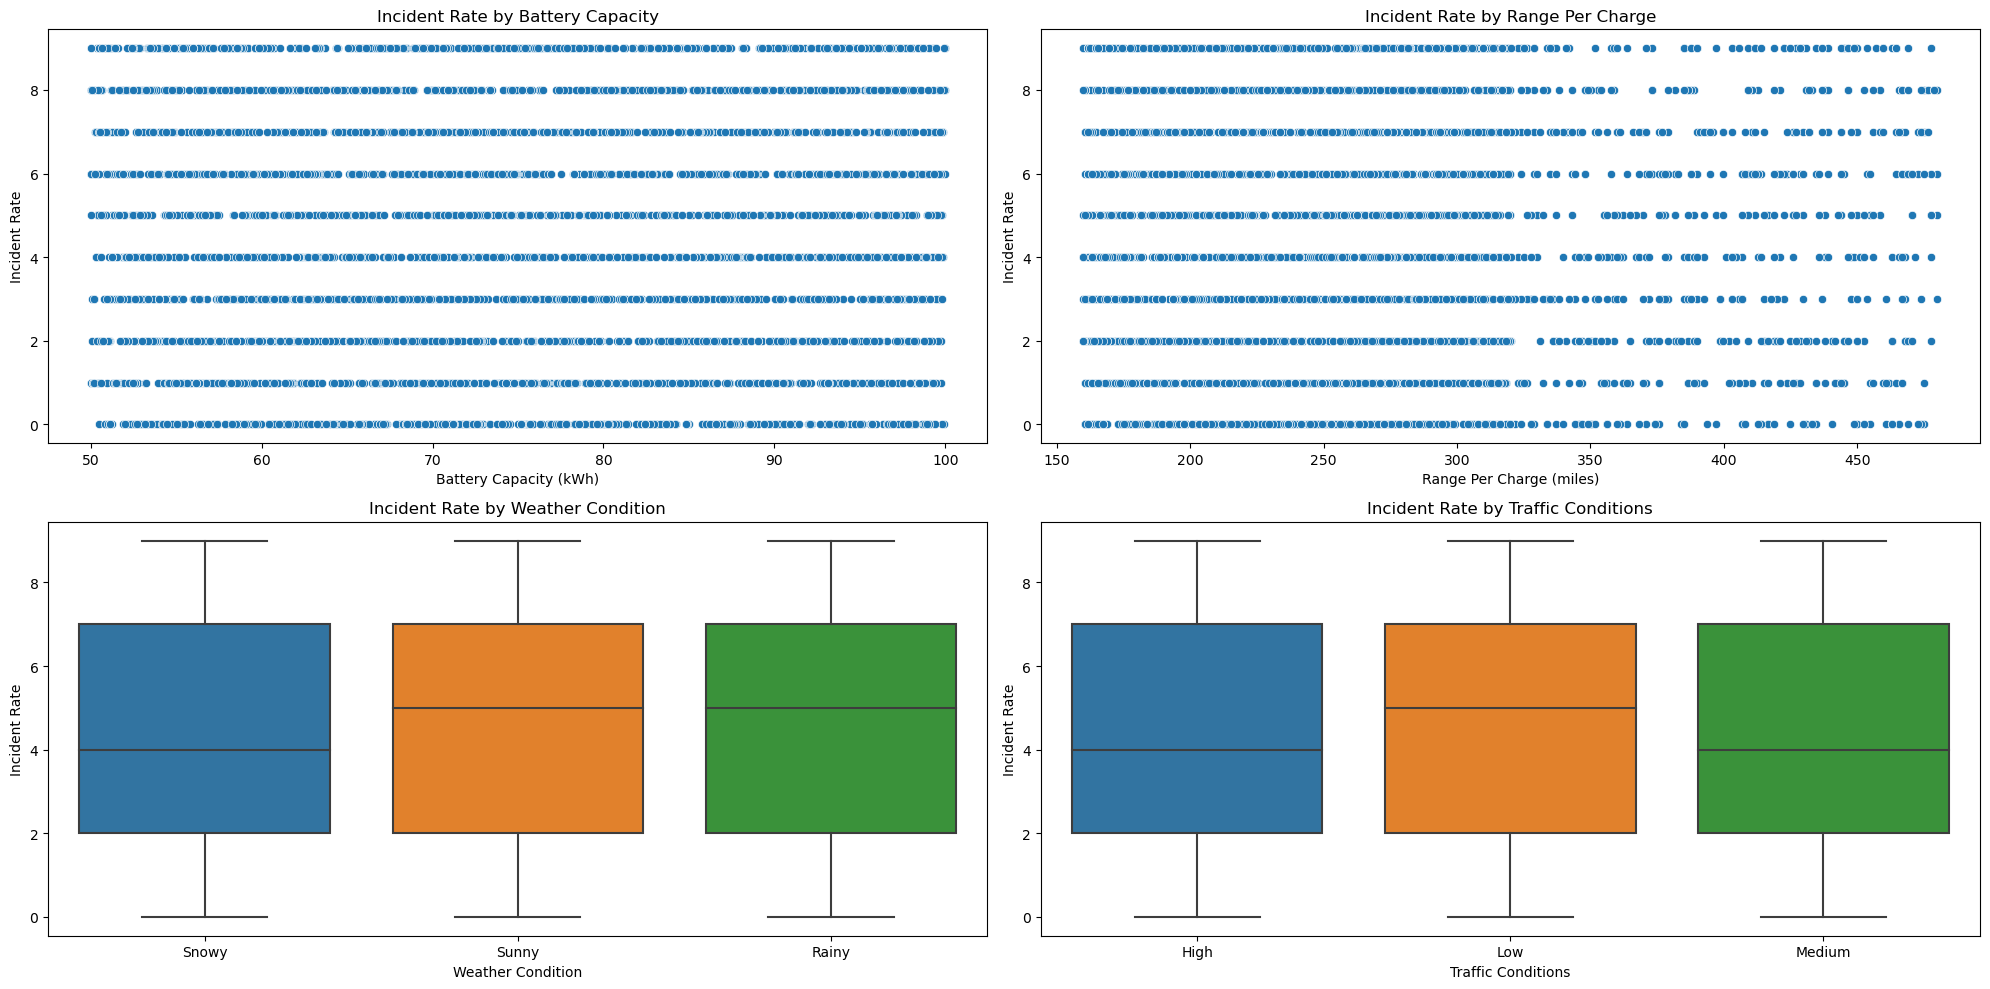

In [21]:
# To plot different graphs for assess vehicle specifications by operating conditions
plt.figure(figsize=(20, 10))

# Visualization 1: Incident Rate by Battery Capacity
plt.subplot(2, 2, 1)
sns.scatterplot(data=avd, x='Battery_Capacity_kWh', y='Incident_Rate')
plt.title('Incident Rate by Battery Capacity')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Incident Rate')

# Visualization 2: Incident Rate by Range Per Charge
plt.subplot(2, 2, 2)
sns.scatterplot(data=avd, x='Range_Per_Charge_miles', y='Incident_Rate')
plt.title('Incident Rate by Range Per Charge')
plt.xlabel('Range Per Charge (miles)')
plt.ylabel('Incident Rate')

# Visualization 3: Incident Rate by Weather Condition
plt.subplot(2, 2, 3)
sns.boxplot(data=avd, x='Weather_Condition', y='Incident_Rate')
plt.title('Incident Rate by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Incident Rate')

# Visualization 4: Incident Rate by Traffic Conditions
plt.subplot(2, 2, 4)
sns.boxplot(data=avd, x='Traffic_Conditions', y='Incident_Rate')
plt.title('Incident Rate by Traffic Conditions')
plt.xlabel('Traffic Conditions')
plt.ylabel('Incident Rate')

plt.tight_layout()
plt.show()

### Incident Rate by Battery Capacity: There is no relationship between how long a battery lasts and incident rate.

### Incident Rate by Range Per Charge: How far a vehicle can travel on a single charge (in miles) is not affected by incident rate.

### Incident Rate by Weather Condition: It indicates that vehicles are less prone to incidence under snowy and high traffic rate conditions, compared to the rest weather and traffic conditions.

## What are the most significant predictors of autonomous vehicle success in navigating without human intervention?

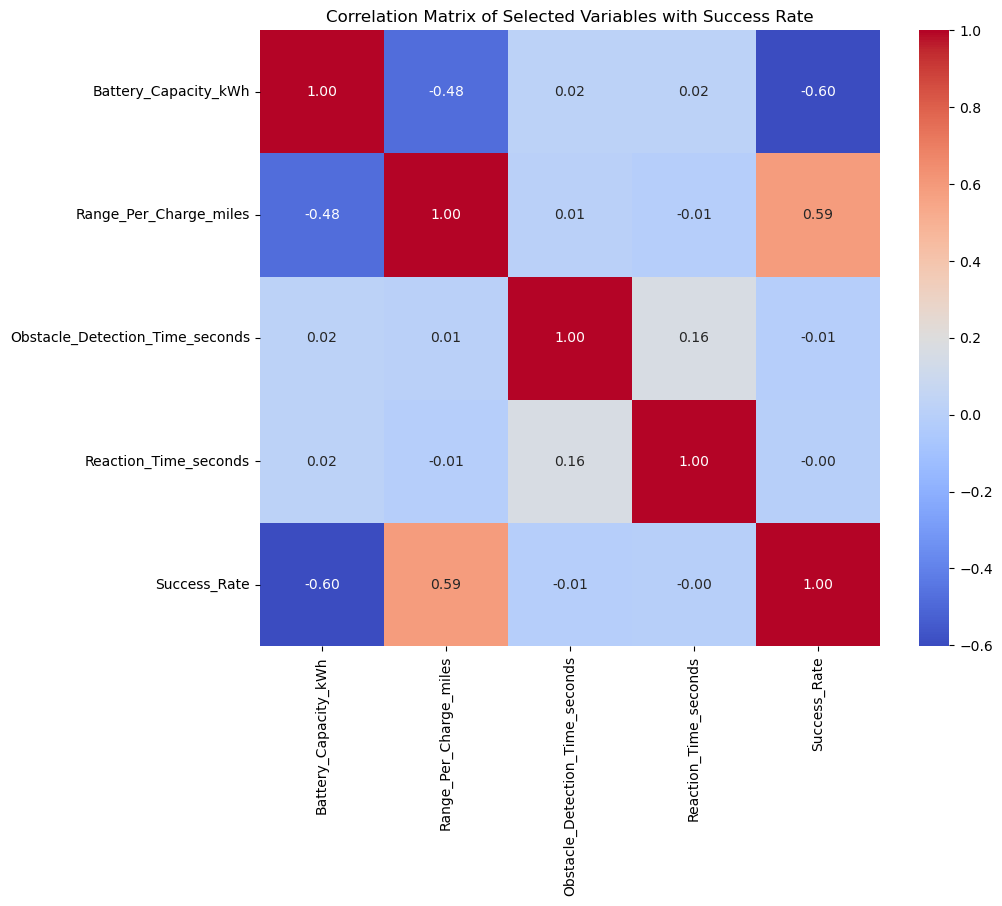

In [22]:
# Selecting a subset of variables to examine for potential correlation with Success_Rate
variables_to_examine = ['Battery_Capacity_kWh', 'Range_Per_Charge_miles', 'Obstacle_Detection_Time_seconds', 'Reaction_Time_seconds', 'Success_Rate']

# Creating a new DataFrame with just the selected variables
subset_df = avd[variables_to_examine]

# Calculating the correlation matrix
correlation_matrix = subset_df.corr()

# Plotting the correlation matrix as a heatmap for visualisation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Variables with Success Rate')

plt.show()

### Battery Capacity and Success Rate: There is a negative correlation (-0.60), indicating that vehicles with larger battery capacities tend to have lower success rates, possibly due to longer operational times.

### Range Per Charge and Success Rate: A positive correlation (0.59) here indicates that the ability to cover more miles on a single charge is beneficial for the vehicle's success rate, because it reflects on the efficiency and reliability of the vehicle.

### Range Per Charge and Battery Capacity: Negative correlation (-0.48) shows how far a vehicle can travel after it is charged decreases with battery capacity; this could be due to heavy loads attached to it that run the battery down.

## The end